In [788]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline
plt.style.use('bmh')

In [391]:
import re
import math

In [695]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_period_dtype
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [961]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df = pd.concat([df_train.drop('Survived', axis=1), df_test])

In [821]:
df_train_2 = pd.read_csv('data/train.csv')
df_test_2 = pd.read_csv('data/test.csv')

In [959]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [960]:
df_train.head()

,Survived,Age,Fare,Single,Double,Family,Extended_Family,Title_Officer,Title_Royalty,Title_Mrs,Title_Mr,Title_Miss,Title_Master,is_male,is_female,Ticket_0,Ticket_10,Ticket_30,Ticket_100,Embarked_S,Embarked_C,Embarked_Q,Cabin_T,Cabin_U,Cabin_A,Cabin_G,Cabin_C,Cabin_F,Cabin_B,Cabin_E,Cabin_D,Pclass_1,Pclass_2,Pclass_3
0,0,-0.534891,-0.502445,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0.668392,0.786845,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,-0.234070,-0.488854,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0.442776,0.420730,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0.442776,-0.486337,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [794]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [795]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [796]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [804]:
df_train.describe(include=['O']).T

,count,unique,top,freq
Name,891,891,"Minahan, Dr. William Edward",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [805]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [806]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [807]:
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [808]:
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


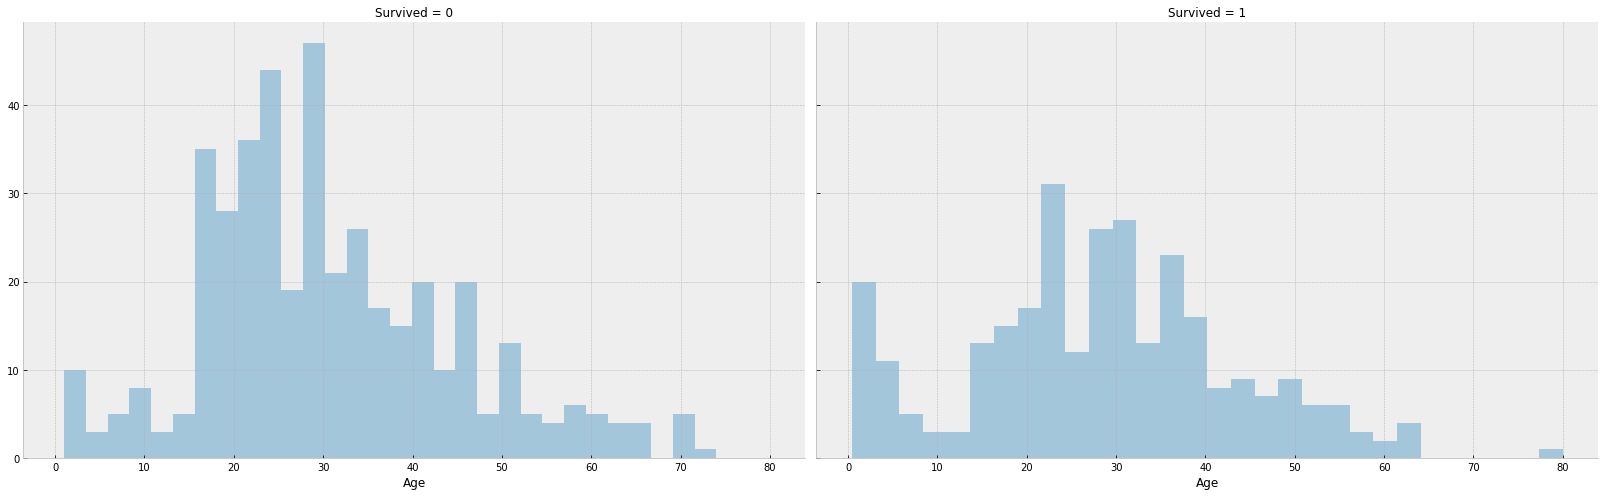

In [809]:
grid = sns.FacetGrid(df_train, col='Survived', height=7, aspect=1.6)
grid.map(sns.distplot, 'Age', bins=30, kde=False)

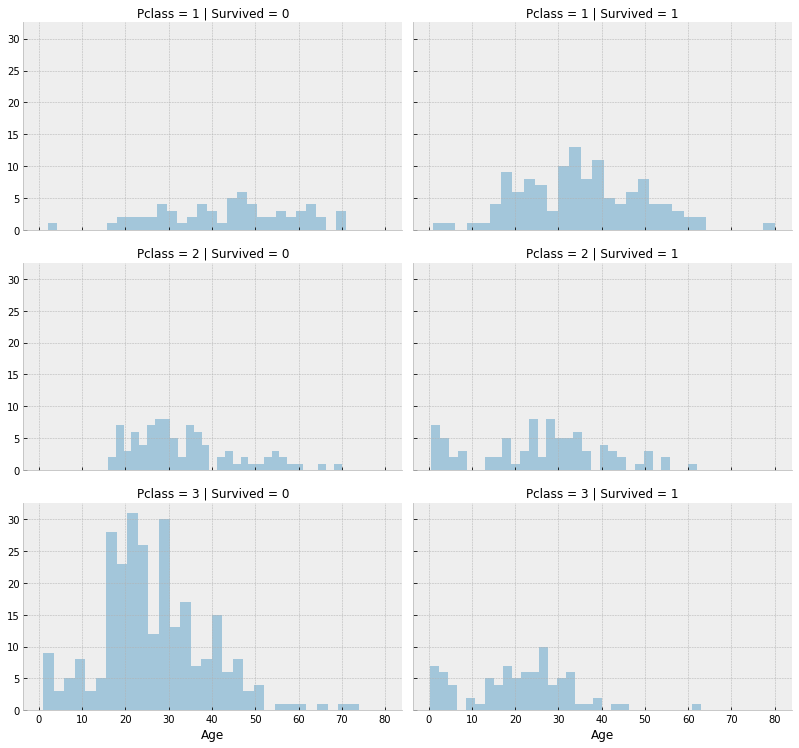

In [810]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=3.5, aspect=1.6)
grid.map(sns.distplot, 'Age', bins=30, kde=False)

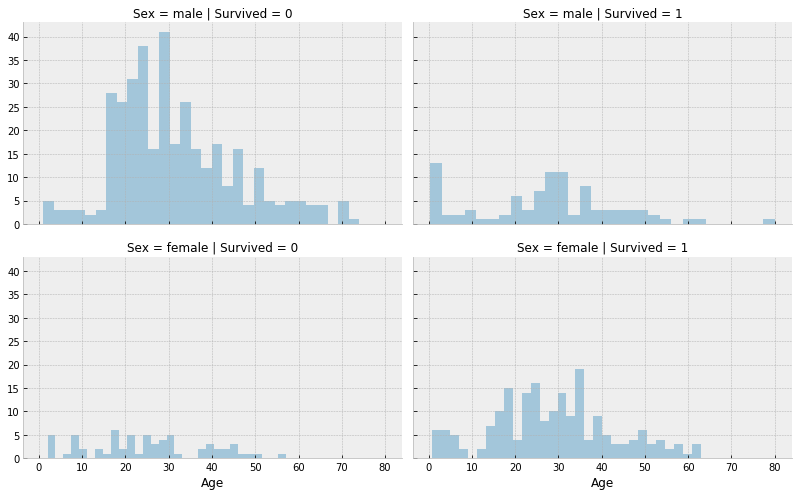

In [140]:
grid = sns.FacetGrid(df_train, col='Survived', row='Sex', height=3.5, aspect=1.6)
grid.map(sns.distplot, 'Age', bins=30, kde=False)

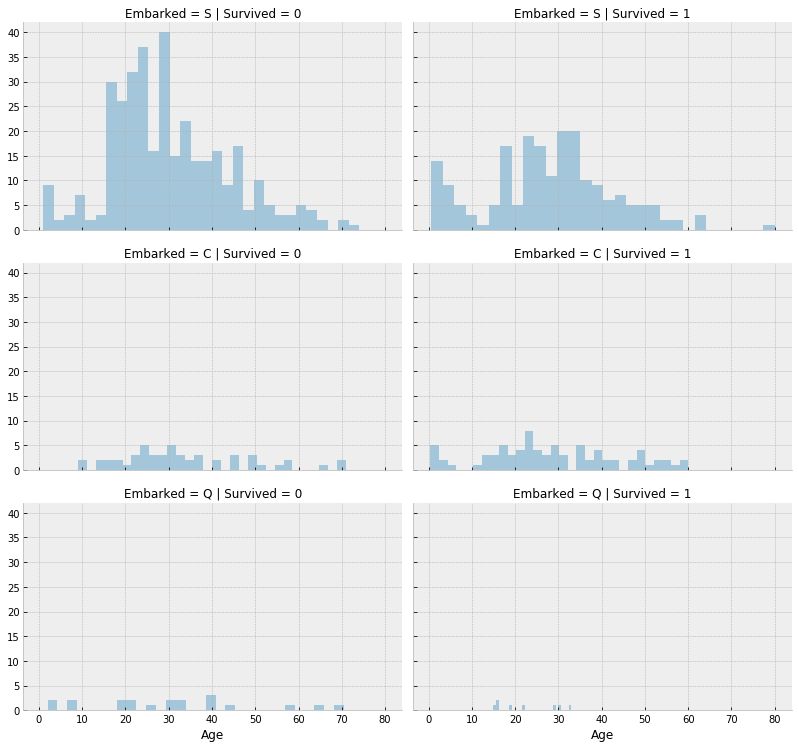

In [142]:
grid = sns.FacetGrid(df_train, col='Survived', row='Embarked', height=3.5, aspect=1.6)
grid.map(sns.distplot, 'Age', bins=30, kde=False)

## Feature Engineering

In [933]:
def feature_mapping(df, remove_columns = [], mapper=None):
    train_cats(df)
    training = False
    if mapper is None:
        mapper = {}
        training = True

    def extract_title_from_name(df):
        df = df.copy()
        df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
        df.drop('Name', axis=1, inplace=True)
        return df
    
    def extract_prefix_from_ticket(df):
        df = df.copy()
        df['Ticket_prefix'] = df['Ticket'].apply(lambda x: x.split(' ')[0].replace(".", "").replace("/", "") if not x.split(' ')[0].isdigit() else 'X')
        df.drop('Ticket', axis=1, inplace=True)
        return df
    
    def create_family_size(df):
        df = df.copy()
        df["Fsize"] = df["SibSp"] + df["Parch"] + 1
        df['Single'] = df['Fsize'].map(lambda x: 1 if x == 1 else 0)
        df['Double'] = df['Fsize'].map(lambda x: 1 if x == 2 else 0)
        df['Family'] = df['Fsize'].map(lambda x: 1 if 3 <= x <= 5 else 0)
        df['Extended_Family'] = df['Fsize'].map(lambda x: 1 if x >= 6 else 0)
        df.drop(['SibSp', 'Parch', 'Fsize'], axis=1, inplace=True)
        return df
    
    def map_title(df):
        df = df.copy()
        if training:
            title_mapping = {
                "Capt": "Officer",
                "Col": "Officer",
                "Major": "Officer",
                "Jonkheer": "Royalty",
                "Don": "Royalty",
                "Sir" : "Royalty",
                "Dr": "Officer",
                "Rev": "Officer",
                "the Countess":"Royalty",
                "Mme": "Mrs",
                "Mlle": "Miss",
                "Ms": "Mrs",
                "Mr" : "Mr",
                "Mrs" : "Mrs",
                "Miss" : "Miss",
                "Master" : "Master",
                "Lady" : "Royalty"
            }
            mapper['Title_Map'] = title_mapping
        else:
            title_mapping = mapper['Title_Map']
        df['Title'] = df['Title'].map(title_mapping)
        df['Title'] = df['Title'].fillna('Miss')
        df['Title_Officer'] = df['Title'].map(lambda x: 1 if x == 'Officer' else 0)
        df['Title_Royalty'] = df['Title'].map(lambda x: 1 if x == 'Royalty' else 0)
        df['Title_Mrs'] = df['Title'].map(lambda x: 1 if x == 'Mrs' else 0)
        df['Title_Mr'] = df['Title'].map(lambda x: 1 if x == 'Mr' else 0)
        df['Title_Miss'] = df['Title'].map(lambda x: 1 if x == 'Miss' else 0)
        df['Title_Master'] = df['Title'].map(lambda x: 1 if x == 'Master' else 0)
        return df
    
    def map_sex(df):
        df = df.copy()
        if training:
            sex_mapping = {"male": 1, "female": 2}
            mapper['Sex'] = sex_mapping
        else:
            sex_mapping = mapper['Sex']
        
        df['Sex'] = df['Sex'].map(sex_mapping)
        df['Sex'] = df['Sex'].fillna(2)
        df['is_male'] = df['Sex'].map(lambda x: 1 if x == 1 else 0)
        df['is_female'] = df['Sex'].map(lambda x: 1 if x == 2 else 0)
        return df

    def change_ticket_detail(df):
        df = df.copy()
        if training:   
            ticket_mapper = df.groupby(['Ticket_prefix'], as_index=False)['PassengerId'].count().to_dict('records')
            tmp = list(map(lambda x: tuple(x.values()), ticket_mapper))
            def map_ticket_fn(x):
                l = 0
                if 1 <= x[1] <= 10:
                    l = 1
                elif 11 <= x[1] <= 30:
                    l = 2
                elif 30 <= x[1] <= 100:
                    l = 3
                return (x[0], l)
            tmp_map = dict(list(map(map_ticket_fn, tmp)))
            mapper['Ticket_prefix'] = tmp_map
        else:
            tmp_map = mapper['Ticket_prefix']
        df['Ticket_prefix'] = df['Ticket_prefix'].map(tmp_map)
        df['Ticket_prefix'].fillna(0, inplace=True)
        df['Ticket_0'] = df['Ticket_prefix'].map(lambda x: 1 if x == 0 else 0)
        df['Ticket_10'] = df['Ticket_prefix'].map(lambda x: 1 if x == 1 else 0)
        df['Ticket_30'] = df['Ticket_prefix'].map(lambda x: 1 if x == 2 else 0)
        df['Ticket_100'] = df['Ticket_prefix'].map(lambda x: 1 if x == 3 else 0)
        return df
    
    def age_imputer(df): 
        if training:
            age_mapper = df[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex'], as_index=False).median()
            mapper['age_mapper'] = age_mapper
        else:
            age_mapper = mapper['age_mapper']
        def age_imputer_fn(row):
            age = age_mapper.loc[(age_mapper['Pclass'] == row['Pclass']) & (age_mapper['Sex'] == row['Sex'])]['Age'] 
            if math.isnan(row['Age']):
                return np.asscalar(age)
            else:
                return float(row['Age'])
        df['Age'] = df.apply(age_imputer_fn, axis=1)
        df['Age'] = StandardScaler().fit_transform(df['Age'].values.reshape(-1, 1))
        return df
    
    def normalize_fare(df):
        df = df.copy()
        if training:
            fare_map = df['Fare'].median()
            mapper['fare_map'] = fare_map
        else:
            fare_map = mapper['fare_map']
        df['Fare'].fillna(fare_map, inplace=True)
        df['Fare'] = StandardScaler().fit_transform(df['Fare'].values.reshape(-1, 1))
        return df
    
    def map_embarked(df):
        df = df.copy()
        df["Embarked"] = df["Embarked"].fillna("S")
        if training:
            embarked = {'S': 1, 'C': 2, 'Q': 3} 
            mapper['embarked'] = embarked
        else:
            embarked = mapper['embarked']
        df['Embarked'] = df['Embarked'].map(embarked)
        df['Embarked_S'] = df['Embarked'].map(lambda x: 1 if x == 1 else 0)
        df['Embarked_C'] = df['Embarked'].map(lambda x: 1 if x == 2 else 0)
        df['Embarked_Q'] = df['Embarked'].map(lambda x: 1 if x == 3 else 0)
        return df

    def map_cabin(df):
        df = df.copy()
        df['Cabin'].cat.add_categories("U").fillna('U', inplace=True)
        df["Cabin"] = df["Cabin"].apply(lambda x: x[0])
        if training:
            cabin_map = {
                'T': 0,
                'U': 1,
                'A': 2,
                'G': 3,
                'C': 4,
                'F': 5,
                'B': 6,
                'E': 7,
                'D': 8
            }
            mapper['Cabin'] = cabin_map
        else:
            cabin_map = mapper['Cabin']
        df['Cabin'] = df['Cabin'].map(cabin_map)
        df['Cabin_T'] = df['Cabin'].map(lambda x: 1 if x == 0 else 0)
        df['Cabin_U'] = df['Cabin'].map(lambda x: 1 if x == 1 else 0)
        df['Cabin_A'] = df['Cabin'].map(lambda x: 1 if x == 2 else 0)
        df['Cabin_G'] = df['Cabin'].map(lambda x: 1 if x == 3 else 0)
        df['Cabin_C'] = df['Cabin'].map(lambda x: 1 if x == 4 else 0)
        df['Cabin_F'] = df['Cabin'].map(lambda x: 1 if x == 5 else 0)
        df['Cabin_B'] = df['Cabin'].map(lambda x: 1 if x == 6 else 0)
        df['Cabin_E'] = df['Cabin'].map(lambda x: 1 if x == 7 else 0)
        df['Cabin_D'] = df['Cabin'].map(lambda x: 1 if x == 8 else 0)
        return df
    
    def pclass_map(df):
        df = df.copy()
        df['Pclass'].fillna(0, inplace=True)
        df['Pclass_1'] = df['Pclass'].map(lambda x: 1 if x == 1 else 0)
        df['Pclass_2'] = df['Pclass'].map(lambda x: 1 if x == 2 else 0)
        df['Pclass_3'] = df['Pclass'].map(lambda x: 1 if x == 3 else 0)
        return df
    
    def remove_missing(df, columns_list, limit=0.0):
        """
        Deletes any column less than the provided limit
        """
        df = df.copy()
        matching_column = [column for column in df if df[column].count() / len(df) <= limit]
        columns_list.extend(matching_column)
        df.drop(columns_list, axis = 1, inplace=True)
        return df

    df = extract_title_from_name(df)
    df = extract_prefix_from_ticket(df)
    df = create_family_size(df)
    df = map_title(df)
    df = map_sex(df)
    df = change_ticket_detail(df)
    df = normalize_fare(df)
    df = age_imputer(df)
    df = map_embarked(df)
    df = map_cabin(df)
    df = pclass_map(df)
    remove_columns.extend(['Pclass', 'Sex', 'Cabin', 'Embarked', 'Title', 'Ticket_prefix'])
    df = remove_missing(df, remove_columns)
    return df, mapper
    

In [934]:
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): 
            df[n] = c.astype('category').cat.as_ordered()
            

def is_string_dtype(arr_or_dtype):
    if arr_or_dtype is None:
        return False
    try:
        dtype = arr_or_dtype.dtype
        return dtype.kind in ('O', 'S', 'U') and not is_period_dtype(dtype)
    except TypeError:
        return False

In [936]:
df_train, mapper = feature_mapping(df_train, ['PassengerId'])

In [937]:
df_test, mapper = feature_mapping(df_test, ['PassengerId'], mapper)

In [938]:
df_train.head(2)

,Survived,Age,Fare,Single,Double,Family,Extended_Family,Title_Officer,Title_Royalty,Title_Mrs,Title_Mr,Title_Miss,Title_Master,is_male,is_female,Ticket_0,Ticket_10,Ticket_30,Ticket_100,Embarked_S,Embarked_C,Embarked_Q,Cabin_T,Cabin_U,Cabin_A,Cabin_G,Cabin_C,Cabin_F,Cabin_B,Cabin_E,Cabin_D,Pclass_1,Pclass_2,Pclass_3
0,0,-0.534891,-0.502445,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0.668392,0.786845,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
grid = sns.FacetGrid(df_train, col='Survived', row='Cabin', height=3.5, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)

In [20]:
test = remove_missing(df_train)

### Checking the distribution of data

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


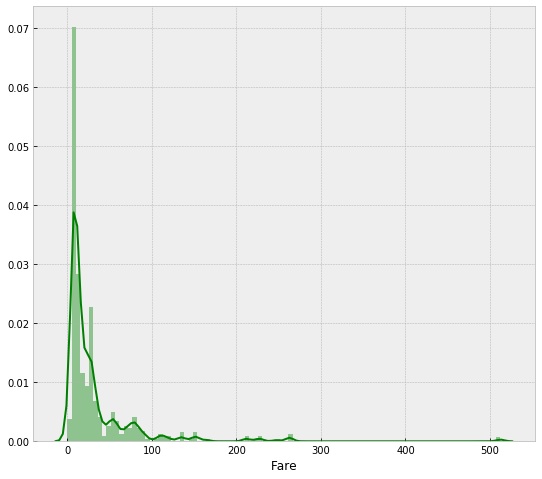

In [101]:
print(df_train['Fare'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train['Fare'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [193]:
df_train.describe(include=['O'])

,Sex,Ticket,Cabin,Embarked,Title
count,891,891,204,889,891
unique,2,681,147,3,17
top,male,347082,B96 B98,S,Mr
freq,577,7,4,644,517


In [28]:
list(set(df_train.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [95]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


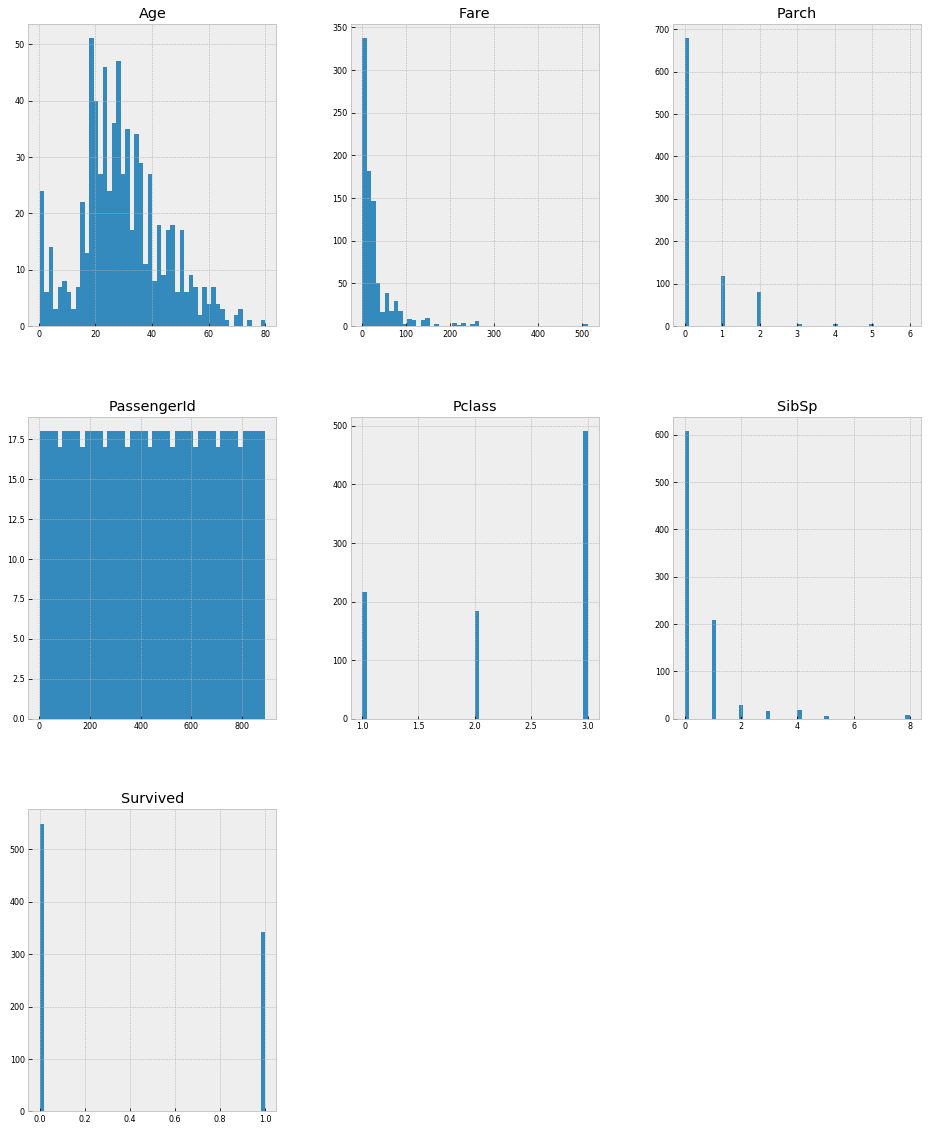

In [35]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [33]:
df_train.Survived.dtype

dtype('int64')

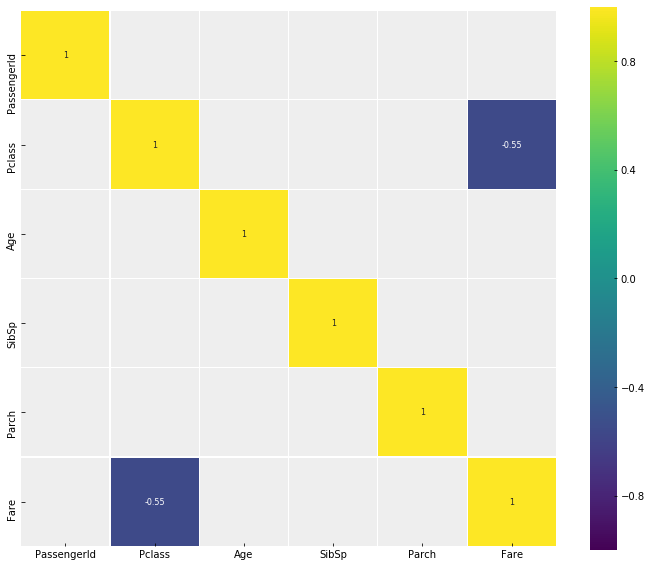

In [86]:
corr = df_num.drop('Survived', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### sns.set_style("darkgrid")

# Checking for missing data

# Check Ratio of Survival between Male and Female with Age

/Users/lality/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


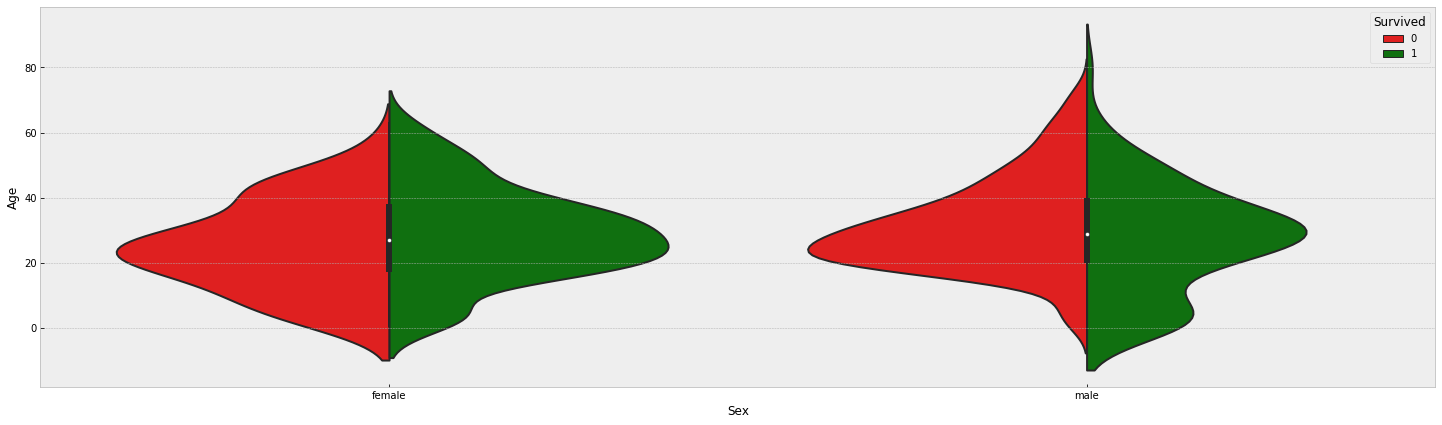

In [57]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, split=True, palette={0: "r", 1: "g"});

# Check Relationship between pair of data

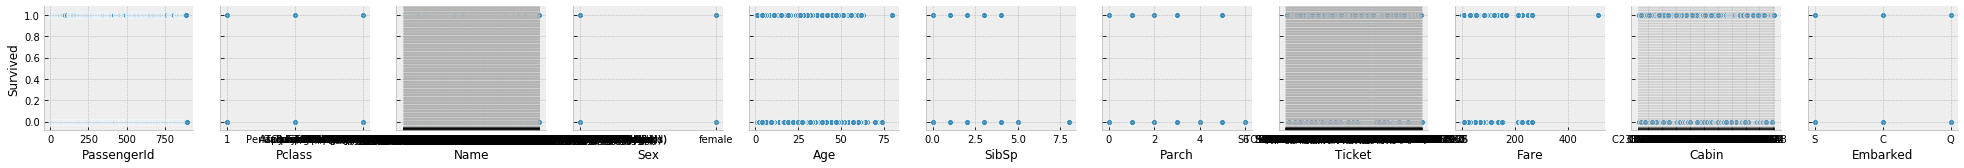

In [58]:
sns.pairplot(df_train, x_vars=['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked'], y_vars='Survived')

In [59]:
def process_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None, 
               preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not ignore_flds:
        ignore_flds = []
    if not skip_flds:
        skip_flds = []
    if subset:
        df = get_sample(df, subset)
    else:
        df = df.copy()
    ignore_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn:
        preproc_fn(df)
    if y_fld is None:
        y = None
    else:
        if not is_numeric_dtype(df[y_fld]):
            df[y_fld] = df[y_fld].cat.codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)
    
    if na_dict is None:
        na_dict = {}
    else:
        na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n, c in df.items():
        na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], 
               axis = 1, inplace=True)
    if do_scale:
        mapper = scale_vars(df, mapper)
    for n, c in df.items():
        numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignore_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale:
        res = res + [mapper]
    return res

In [60]:
def get_sample(df, n):
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

In [61]:
def fix_missing(df, col, name, na_dict):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [62]:
def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and (max_n_cat is None or len(col.cat.categories) > max_n_cat):
        df[name] = col.cat.codes + 1

In [63]:
def scale_vars(df, mapper):
    warnings.filterwarnings('ignore', category=sklearn.exceptions.DataConversionWarning)
    if mapper is None:
        map_f = [([n], StandardScaler()) for n in df.columns if is_numeric_dtype(df[n])]
        mapper = DataFrameMapper(map_f).fit(df)
    df[mapper.transformed_names_] = mapper.transform(df)
    return mapper

In [64]:
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): 
            df[n] = c.astype('category').cat.as_ordered()
            

def is_string_dtype(arr_or_dtype):
    if arr_or_dtype is None:
        return False
    try:
        dtype = arr_or_dtype.dtype
        return dtype.kind in ('O', 'S', 'U') and not is_period_dtype(dtype)
    except TypeError:
        return False

In [65]:
train_cats(df_train)

In [66]:
df, y, nas = process_df(df_train, 'Survived')

In [67]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na
0,1,3,109,2,22.0,1,0,524,7.2500,0,3,False
1,2,1,191,1,38.0,1,0,597,71.2833,82,1,False
2,3,3,354,1,26.0,0,0,670,7.9250,0,3,False
3,4,1,273,1,35.0,1,0,50,53.1000,56,3,False
4,5,3,16,2,35.0,0,0,473,8.0500,0,3,False


In [68]:
df_dummy = pd.DataFrame(data = df)

In [69]:
def scale_data(df, columns):
    left_columns = set(df.columns) - set(columns)
    df_dummy = df.copy()
    df_dummy = df.loc[:, columns].apply(lambda x: np.log(x + 1))
    return pd.concat([df_dummy, df.loc[:, left_columns]], axis=1)

In [70]:
df_log_transformed = scale_data(df, ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'])

In [962]:
X = df_train.drop('Survived', axis=1)
y = df_train.Survived

In [963]:
from sklearn.model_selection import train_test_split

In [964]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 712 samples.
Testing set has 179 samples.


In [965]:
from sklearn.metrics import fbeta_score, accuracy_score

In [966]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = None
    predictions_train = None
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], learner.predict(X_train[:300]))
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, learner.predict(X_test))
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], learner.predict(X_train[:300]), 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, learner.predict(X_test), 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [967]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

ValueError: could not convert string to float: 'Boulos, Mrs. Joseph (Sultana)'

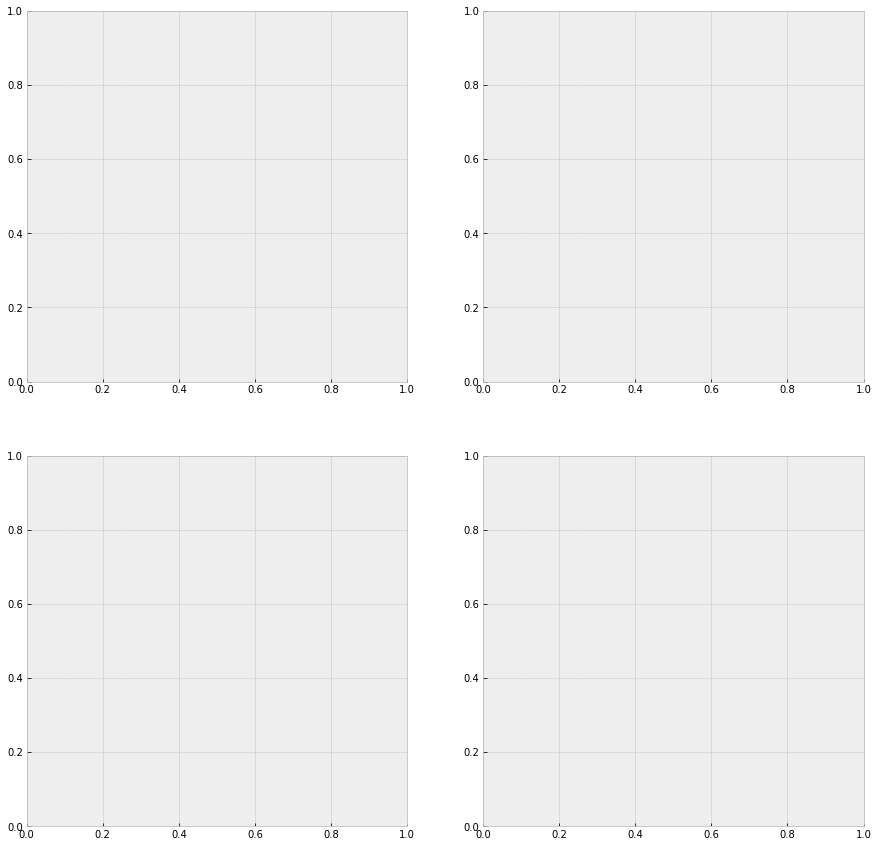

In [969]:
models = [GaussianNB(), LogisticRegression(), DecisionTreeClassifier(),
              RandomForestClassifier(n_estimators=100), GradientBoostingClassifier(n_estimators=100),
             AdaBoostClassifier()]
samples_100 = len(X_train)
samples_10 = int(samples_100 * (0.1))
samples_1 = int(samples_10 * (0.1))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
results_dict = {}
colors = ['b','g','r', 'y', 'k', 'c', 'm', 'orange']
for model in models:
    print("===========================================")
    for sample in [samples_100]:
        results = train_predict(model, sample, X_train, y_train, X_test, y_test)
        print(results)
        print("---------------------------------------")
    results_dict[model.__class__.__name__] = results
    print("===========================================")
for i, (key ,value) in enumerate(results_dict.items()):
    axes[0, 0].bar(key, value['f_train'], 'o-', color=colors[i],
             label="Training score")
    axes[0, 1].bar(key, value['f_test'], 'o-', color=colors[i],
             label="Training score")
    axes[1, 0].bar(key, value['acc_train'], 'o-', color=colors[i],
             label="Training score")
    axes[1, 1].bar(key, value['acc_test'], 'o-', color=colors[i],
             label="Training score")
fig.tight_layout()

In [947]:
models = [GradientBoostingClassifier(n_estimators=100),
          GradientBoostingClassifier(n_estimators=200),
          GradientBoostingClassifier(n_estimators=1000),
          GradientBoostingClassifier(n_estimators=1500),
         GradientBoostingClassifier(n_estimators=2000),
         GradientBoostingClassifier(n_estimators=3000)]
samples_100 = len(X_train)
for model in models:
    print("===========================================")
    for sample in [samples_100]:
        results = train_predict(model, sample, X_train, y_train, X_test, y_test)
        print(results)
        print("---------------------------------------")
    results_dict[model.__class__.__name__] = results
    print("===========================================")

GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.11923575401306152, 'pred_time': 0.0, 'acc_train': 0.8866666666666667, 'acc_test': 0.8379888268156425, 'f_train': 0.8663883089770354, 'f_test': 0.8044164037854891}
---------------------------------------
GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.22386479377746582, 'pred_time': 1.1920928955078125e-06, 'acc_train': 0.9566666666666667, 'acc_test': 0.8491620111731844, 'f_train': 0.9514563106796117, 'f_test': 0.8153846153846154}
---------------------------------------
GradientBoostingClassifier trained on 712 samples.
{'train_time': 1.0693140029907227, 'pred_time': 0.0, 'acc_train': 0.9933333333333333, 'acc_test': 0.8324022346368715, 'f_train': 0.9962049335863378, 'f_test': 0.7943925233644861}
---------------------------------------
GradientBoostingClassifier trained on 712 samples.
{'train_time': 1.6487102508544922, 'pred_time': 0.0, 'acc_train': 0.9933333333333333, 'acc_test': 0.8100558659217877, 

In [948]:
models = [GradientBoostingClassifier(n_estimators=200, learning_rate=0.1),
          GradientBoostingClassifier(n_estimators=200, learning_rate=0.12),
          GradientBoostingClassifier(n_estimators=200, learning_rate=0.15),
          GradientBoostingClassifier(n_estimators=200, learning_rate=0.17),
         GradientBoostingClassifier(n_estimators=200, learning_rate=0.2),
         GradientBoostingClassifier(n_estimators=200, learning_rate=0.16)]
samples_100 = len(X_train)
for model in models:
    print("===========================================")
    for sample in [samples_100]:
        results = train_predict(model, sample, X_train, y_train, X_test, y_test)
        print(results)
        print("---------------------------------------")
    results_dict[model.__class__.__name__] = results
    print("===========================================")

GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.22289514541625977, 'pred_time': 9.5367431640625e-07, 'acc_train': 0.9566666666666667, 'acc_test': 0.8491620111731844, 'f_train': 0.9514563106796117, 'f_test': 0.8153846153846154}
---------------------------------------
GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.21998882293701172, 'pred_time': 0.0, 'acc_train': 0.9633333333333334, 'acc_test': 0.8659217877094972, 'f_train': 0.9664694280078896, 'f_test': 0.8411214953271028}
---------------------------------------
GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.212996244430542, 'pred_time': 9.5367431640625e-07, 'acc_train': 0.9666666666666667, 'acc_test': 0.8659217877094972, 'f_train': 0.9633911368015413, 'f_test': 0.8411214953271028}
---------------------------------------
GradientBoostingClassifier trained on 712 samples.
{'train_time': 0.22016501426696777, 'pred_time': 0.0, 'acc_train': 0.97, 'acc_test': 0.8547486033519553, '

In [951]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.15)
clf.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [952]:
y_pred = clf.predict(df_test)

In [956]:
submission = pd.DataFrame({
        "PassengerId": df_test_2["PassengerId"],
        "Survived": y_pred
    })

In [957]:
submission.Survived.sum()

136

In [958]:
submission.to_csv('submission.csv', index=False)

In [950]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = GradientBoostingClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

# estimators = [100, 200, 500]
# rate = [0.01, 0.03, 0.1, 0.3, 1.0]

parameters = {
            'learning_rate':[0.1, 0.12, 0.15, 0.17, 0.2],
                'max_depth': [10, 20, 30, 50, 100],
                'max_features': [2, 3, 4, 5],
                'min_samples_leaf': [1, 2, 3, 4, 5],
                'min_samples_split': [2, 4, 6],
                'n_estimators': [200]
            }


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer, n_jobs=5, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

KeyboardInterrupt: 

In [761]:
best_clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.7, loss='deviance', max_depth=90,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=8,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [771]:
best_clf.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.7, loss='deviance', max_depth=90,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=8,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [772]:
y_pred = best_clf.predict(df_test)

In [776]:
importances = best_clf.feature_importances_

In [764]:
submission = pd.DataFrame({
        "PassengerId": df_test_2["PassengerId"],
        "Survived": y_pred
    })

In [768]:
submission.to_csv('submission2.csv', index=False)

In [769]:
submission.Survived.sum()

128

In [780]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  


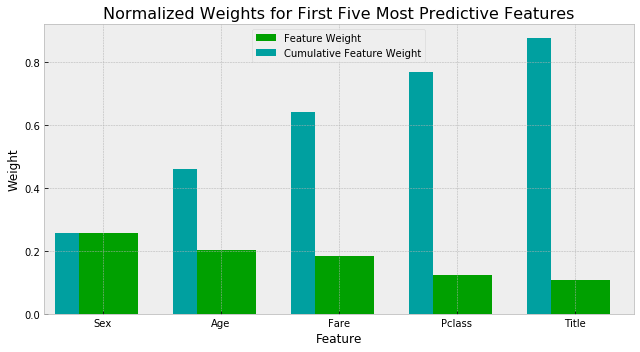

In [781]:
feature_plot(importances, X, y)